In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('task9.csv')
print(data.head())
print(data.info())

data = data.fillna(0) 

grade_columns = [
    'Structured Programming', 'OOP', 'Discrete Math', 'Data Structure', 
    'Algorithm', 'Applied Statistics', 'Machine Learning', 'Total Problems Solved'
]

scaler = MinMaxScaler()
data[grade_columns] = scaler.fit_transform(data[grade_columns])

print(data.describe())


   Structured Programming  Structured programming (Sessional)   OOP  \
0                    3.50                                3.50  3.75   
1                    2.75                                2.75  3.50   
2                    2.00                                2.50  2.25   
3                    2.00                                3.25  2.75   
4                    3.50                                2.50  3.75   

   OOP (Sessional)  Discrete Math  Calculus  English Skill Development  \
0             3.50           4.00      4.00                       3.50   
1             3.75           2.50      2.25                       3.00   
2             3.50           3.75      2.25                       4.00   
3             3.50           2.00      2.00                       3.00   
4             4.00           3.50      3.25                       2.75   

   Data Structure  Data Structure (Sessional)  Algorithm  ...  \
0            3.75                        4.00       3.75  ...  

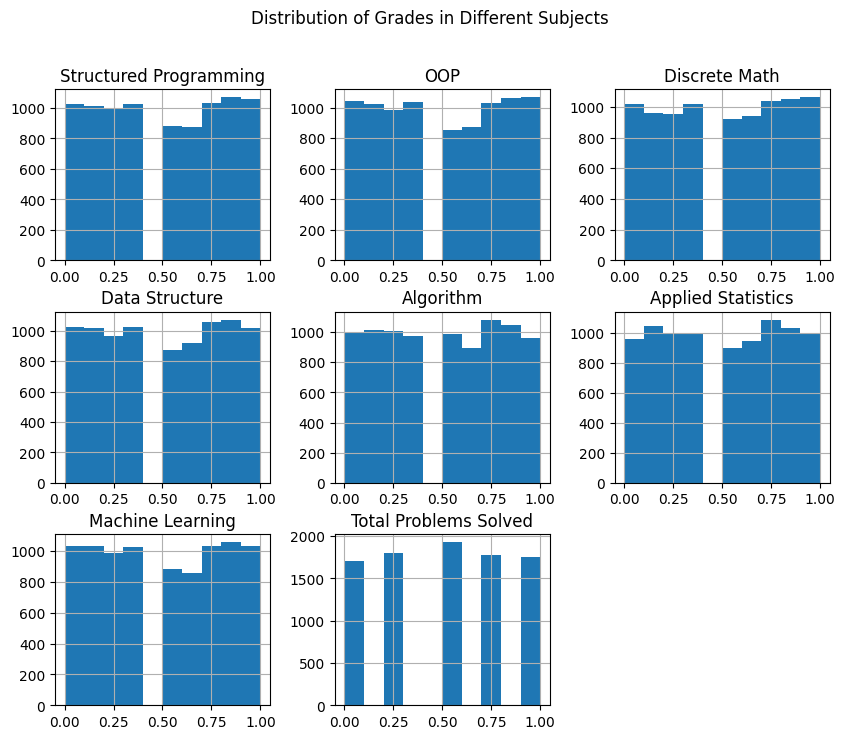

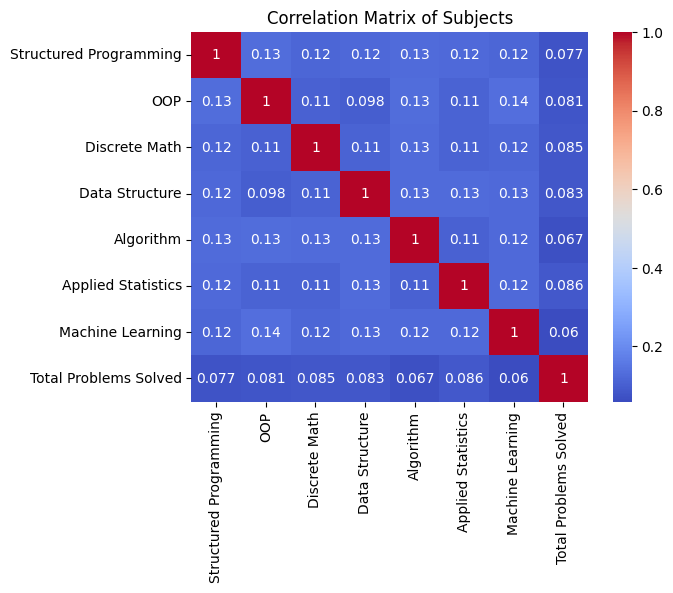

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

data[grade_columns].hist(figsize=(10, 8))
plt.suptitle('Distribution of Grades in Different Subjects')
plt.show()

corr_matrix = data[grade_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Subjects')
plt.show()


In [5]:
data['performance_vector'] = data[grade_columns].values.tolist()
data['overall_performance'] = data[grade_columns].mean(axis=1)


In [3]:
from sklearn.metrics.pairwise import cosine_similarity


performance_data = data[grade_columns].values
cosine_sim = cosine_similarity(performance_data)

def recommend_learning_path(row):
    recommendations = []
    
    if row['Structured Programming'] < 0.3:
        recommendations.append("Introduction to Programming")
    if row['Algorithm'] < 0.3:
        recommendations.append("Basic Algorithms")
    if row['OOP'] < 0.3:
        recommendations.append("Object-Oriented Programming")
    
    if row['Machine Learning'] >= 0.5:
        recommendations.append("Deep Learning")
    if row['Data Structure'] >= 0.5:
        recommendations.append("Advanced Data Structures")

    if row['Machine Learning'] >= 0.7:
        recommendations.append("Reinforcement Learning")
    
    if not recommendations:
        recommendations = ["Introduction to Data Science", "General Programming Skills"]

    return recommendations

data['recommendations'] = data.apply(recommend_learning_path, axis=1)


def recommend_based_on_similarity(student_id):
    sim_scores = list(enumerate(cosine_sim[student_id]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    similar_students = sim_scores[1:6] 
    recommended_courses = []
    
    for student_index, _ in similar_students:
        recommended_courses.extend(data.iloc[student_index]['recommendations'])
    
    return list(set(recommended_courses))

student_id = 0
recommended_courses = recommend_based_on_similarity(student_id)
print(f"Recommended courses for student {student_id}: {recommended_courses}")


Recommended courses for student 0: ['Reinforcement Learning', 'Advanced Data Structures', 'Deep Learning']


In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

ground_truth = [1, 0, 1, 0, 1] 

predicted_recommendations = [1, 0, 1, 1, 0] 

precision = precision_score(ground_truth, predicted_recommendations)
recall = recall_score(ground_truth, predicted_recommendations)
f1 = f1_score(ground_truth, predicted_recommendations)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

def mean_average_precision(recommended_items, relevant_items):
    average_precisions = []
    
    for recs, relevant in zip(recommended_items, relevant_items):
        precisions_at_k = []
        for i, item in enumerate(recs):
            if item in relevant:
                precisions_at_k.append(len(relevant) / (i + 1))
        if precisions_at_k:
            average_precisions.append(np.mean(precisions_at_k))
    
    return np.mean(average_precisions) if average_precisions else 0

recommended_items = [
    [1, 0, 1, 0, 0],  
    [1, 1, 0, 1, 0]  
]
relevant_items = [
    [1, 1, 1, 0, 0],  
    [1, 1, 0, 1, 0]  
]

map_score = mean_average_precision(recommended_items, relevant_items)
print(f"Mean Average Precision: {map_score}")


def hit_rate(recommended_items, relevant_items):
    hits = 0
    total_users = len(recommended_items)
    
    for recs, relevant in zip(recommended_items, relevant_items):
        if any(item in relevant for item in recs):
            hits += 1
    
    return hits / total_users

hit_rate_score = hit_rate(recommended_items, relevant_items)
print(f"Hit Rate: {hit_rate_score}")

def mean_reciprocal_rank(recommended_items, relevant_items):
    reciprocal_ranks = []
    
    for recs, relevant in zip(recommended_items, relevant_items):
        rank = 0
        for i, item in enumerate(recs):
            if item in relevant:
                rank = 1 / (i + 1)
                break
        reciprocal_ranks.append(rank)
    
    return np.mean(reciprocal_ranks)

mrr_score = mean_reciprocal_rank(recommended_items, relevant_items)
print(f"Mean Reciprocal Rank: {mrr_score}")


Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-Score: 0.6666666666666666
Mean Average Precision: 2.283333333333333
Hit Rate: 1.0
Mean Reciprocal Rank: 1.0
